<a href="https://colab.research.google.com/github/Manish-Kaswan/ML-colab-notebooks/blob/main/linear_regression_eg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import copy
import math
import matplotlib.pyplot as plt

In [2]:
def cal_error(X,y,w,b):
    m = X.shape[0]
    err = 0
    for i in range(m):
        fw_b = (X[i]*w+b-y[i])**2
        err += fw_b
    err = err/(2*m)
    return err

In [3]:
def gradient(x,y,w,b):
    m = x.shape[0]
    djw = 0
    djb = 0
    for i in range(m):
        temp_w = (x[i]*w + b - y[i])*x[i]
        temp_b = (x[i]*w + b - y[i])
        djw += temp_w
        djb += temp_b
    djw = djw/m
    djb = djb/m
    return djw, djb

In [4]:
def grad_descent(x,y,w_in,b_in,iter,alpha,gradient_fun,cal_error_fun):
    w = copy.deepcopy(w_in)
    j = []
    p = []
    w = w_in
    b = b_in
    for i in range(iter):
        djw,djb = gradient_fun(x,y,w,b)
        w = w-alpha*djw
        b = b-alpha*djb
        cost = cal_error_fun(x,y,w,b)
        if i<100000:
            p.append([w,b])
            j.append(cost)
        if i% math.ceil(iter/10) == 0:
            print(f"Iteration {i:4}: Cost {j[-1]} ",
                  f"dj_dw: {djw: 0.3e}, dj_db: {djb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,p,j

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Manish-Kaswan/ML-colab-notebooks/main/happy_index.csv')


#x = df['GDP per capita'].values
#x = df['Perceptions of corruption'].values
x = df['Social support'].values
y = df['Score'].values
x_train = x[:150]
y_train = y[:150]
x_test = x[151:]
y_test = y[151:]

In [6]:
print(x_test)

[0.711 0.885 0.517 0.    0.575]


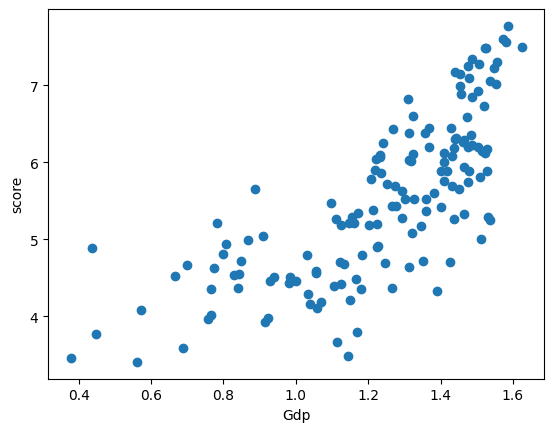

In [7]:
plt.plot(x_train,y_train,'o')
plt.xlabel('Gdp')
plt.ylabel('score')
plt.show()

In [8]:
df.iloc[151:156]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [9]:
w_init = 0
b_init = 0
iterations = 10000
temp_alpha = 0.01

w_final, b_final, j_hist, p_hist = grad_descent(x,y,w_init,b_init,10000,temp_alpha,gradient,cal_error)
print(f"w = {w_final}, b = {b_final}")

Iteration    0: Cost 14.489513473287353  dj_dw: -6.793e+00, dj_db: -5.407e+00   w:  6.793e-02, b: 5.40710e-02
Iteration 1000: Cost 0.24469647825001845  dj_dw: -4.777e-03, dj_db:  5.986e-03   w:  2.756e+00, b: 2.08161e+00
Iteration 2000: Cost 0.24427635252238958  dj_dw: -3.353e-03, dj_db:  4.202e-03   w:  2.796e+00, b: 2.03121e+00
Iteration 3000: Cost 0.24406927677327928  dj_dw: -2.354e-03, dj_db:  2.950e-03   w:  2.824e+00, b: 1.99582e+00
Iteration 4000: Cost 0.24396721121754292  dj_dw: -1.653e-03, dj_db:  2.071e-03   w:  2.844e+00, b: 1.97097e+00
Iteration 5000: Cost 0.24391690413082456  dj_dw: -1.160e-03, dj_db:  1.454e-03   w:  2.858e+00, b: 1.95353e+00
Iteration 6000: Cost 0.24389210827334026  dj_dw: -8.147e-04, dj_db:  1.021e-03   w:  2.868e+00, b: 1.94129e+00
Iteration 7000: Cost 0.24387988664437138  dj_dw: -5.720e-04, dj_db:  7.167e-04   w:  2.875e+00, b: 1.93269e+00
Iteration 8000: Cost 0.2438738627262734  dj_dw: -4.015e-04, dj_db:  5.032e-04   w:  2.880e+00, b: 1.92665e+00
Ite

In [10]:
print(*x_test)
print(*y_test)

0.711 0.885 0.517 0.0 0.575
3.334 3.231 3.203 3.083 2.853


In [11]:
pred = x_test*w_final + b_final
print(*pred)

3.97095587180292 4.4730138951110305 3.4111900297237625 1.9194429144921927 3.578542704159799


In [12]:
print(cal_error(x_test,y_test,w_final,b_final))
#0.4827150252712132

0.387193169354441


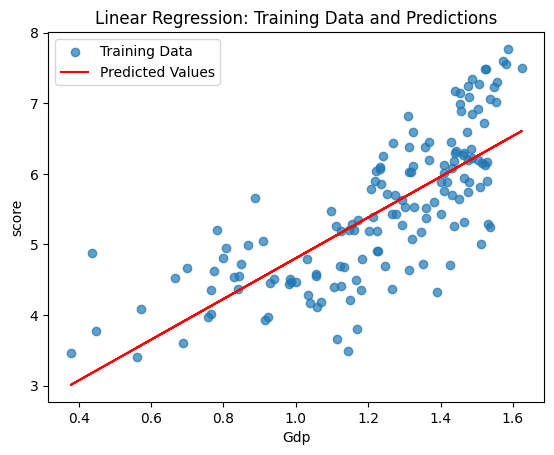

In [13]:
# Assuming x_train, y_train, w_final, and b_final are defined

# Scatter plot with transparency
plt.scatter(x_train, y_train, alpha=0.7, label='Training Data')

# Calculate predicted values
y_predicted = w_final * x_train + b_final

# Line plot
plt.plot(x_train, y_predicted, color='r', label='Predicted Values')

# Set labels and title
plt.xlabel('Gdp')
plt.ylabel('score')
plt.title('Linear Regression: Training Data and Predictions')

# Add legend
plt.legend()

# Show the combined plot
plt.show()


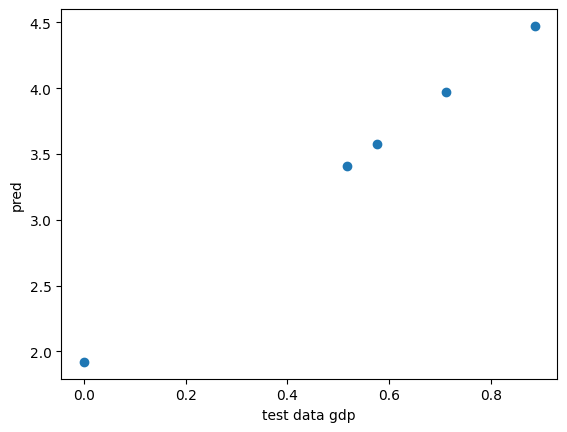

In [14]:
plt.plot(x_test,pred,'o')
plt.xlabel('test data gdp')
plt.ylabel('pred')
plt.show()

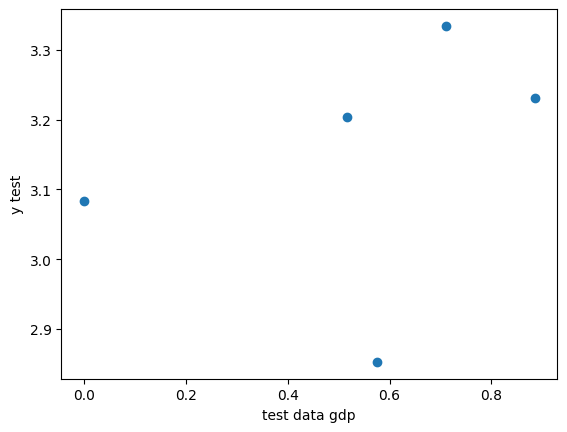

In [15]:
plt.plot(x_test,y_test,'o')
plt.xlabel('test data gdp')
plt.ylabel('y test')
plt.show()